In [1]:
from evaluator import FiLMModelEvaluator
from utils import *
from dataset import SciplexDatasetUnseenPerturbations

import anndata as ad
import math

In [2]:
drugs_list = list(ad.read_h5ad("../data/sciplex/sciplex_preprocessed.h5ad").obs['product_name'].unique())

In [3]:
def split_list(lst):
    # Calculate the split sizes
    total_len = len(lst)
    split_70 = math.floor(total_len * 0.7)
    split_85 = math.floor(total_len * 0.85)

    # Split the list into three parts
    train = lst[:split_70]    # First 70% (training set)
    val = lst[split_70:split_85]   # Next 15% (validation set)
    test = lst[split_85:]     # Remaining 15% (test set)

    return train, val, test

train_drugs, validation_drugs, test_drugs = split_list(drugs_list)

In [4]:
ad_path = "../data/sciplex/sciplex_preprocessed.h5ad"

dataset_train = SciplexDatasetUnseenPerturbations(ad_path, train_drugs)
dataset_validation = SciplexDatasetUnseenPerturbations(ad_path, validation_drugs)
dataset_test = SciplexDatasetUnseenPerturbations(ad_path, test_drugs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 571906/571906 [00:42<00:00, 13450.46it/s]


In [15]:
evalautor = FiLMModelEvaluator("../config/FiLM.yaml", dataset_train, dataset_validation, dataset_test)
evalautor.train()
evalautor.test()
results = evalautor.get_test_results()
results = get_model_stats(results)

Begin training ...
Epoch 1/4
Iteration: 10 Test Loss: 0.18187116086483002 Avg. Validation Loss: 0.17918197838244615
Iteration: 20 Test Loss: 0.1371711641550064 Avg. Validation Loss: 0.13800051146083409
Iteration: 30 Test Loss: 0.11818623542785645 Avg. Validation Loss: 0.12147212805755345
Iteration: 40 Test Loss: 0.10538258403539658 Avg. Validation Loss: 0.11209656256768438
Iteration: 50 Test Loss: 0.09535292536020279 Avg. Validation Loss: 0.10456178429318064
Iteration: 60 Test Loss: 0.08610766381025314 Avg. Validation Loss: 0.09866713534718678
Iteration: 70 Test Loss: 0.0790613442659378 Avg. Validation Loss: 0.0931988615128729
Iteration: 80 Test Loss: 0.07240088284015656 Avg. Validation Loss: 0.08853898519351158
Iteration: 90 Test Loss: 0.06613831967115402 Avg. Validation Loss: 0.08419300900933183
Iteration: 100 Test Loss: 0.06139737367630005 Avg. Validation Loss: 0.0802729107255553
Iteration: 110 Test Loss: 0.05618983507156372 Avg. Validation Loss: 0.07661996997984839
Iteration: 120 T

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [00:02<00:00, 63.76it/s]


Testing completed. Results stored in 'self.test_results'.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:06<00:00,  4.52it/s]


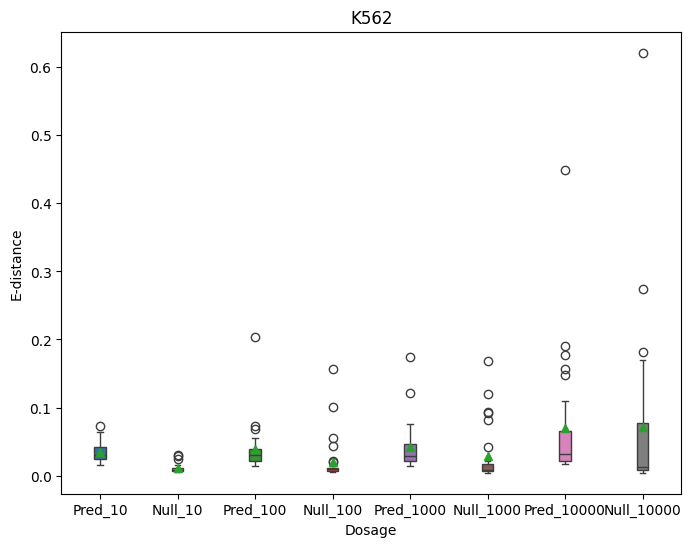

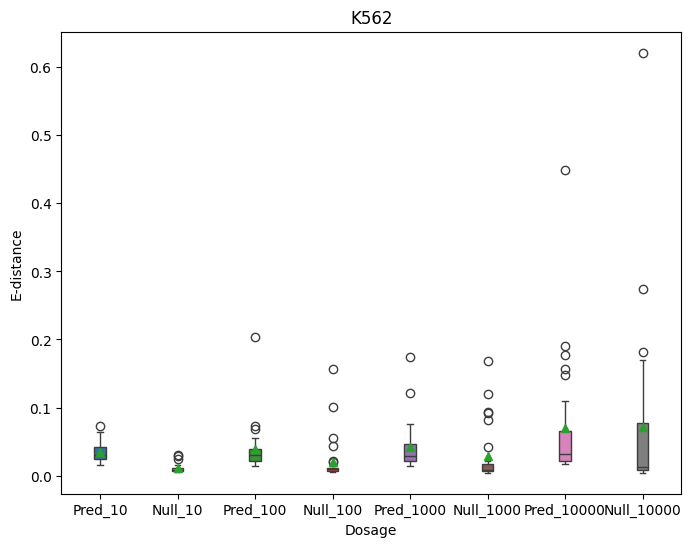

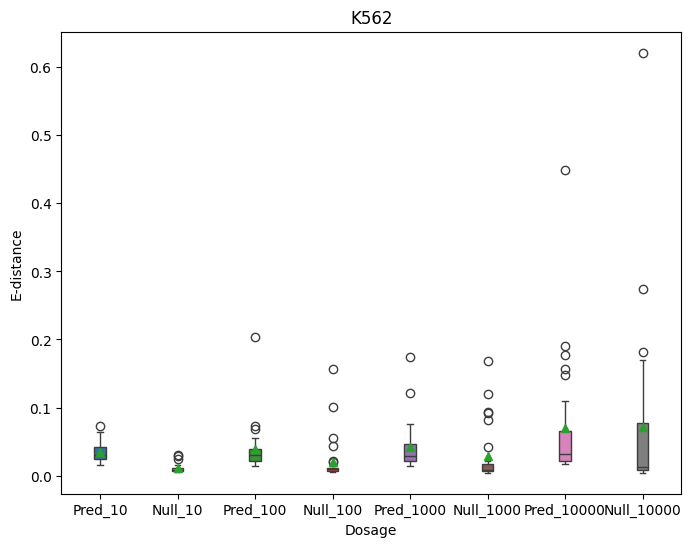

In [17]:
plot_results(results, "K562")
plot_results(results, "K562")
plot_results(results, "K562")